<a href="https://colab.research.google.com/github/oliverrmaa/data-wrangling-springboard/blob/main/notebooks/data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning

In [1]:
# Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Google Drive mount authentication
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
# Clone instructor's git repo over to access data 
#!git clone https://github.com/oliverrmaa/data-wrangling-springboard.git

# 1. Fetch Data & Basic Exploration

Here we will grab data from an Excel File located in our github repo. We will 
use Pandas to extract from the file and also do some brief basic summary level
explorations of the data

In [4]:
pwd

'C:\\Users\\User\\Documents\\GitHub\\data-wrangling-springboard\\notebooks'

In [8]:
PATH = "/Users/User/Documents/GitHub/data-wrangling-springboard/data/movie_ratings.xlsx"
excel_file = pd.ExcelFile(PATH)

df_list = [excel_file.parse(sheet_name) for sheet_name in excel_file.sheet_names]

In [9]:
df_movies = df_list[0]
df_rating = df_list[1]

## 1.1 Ratings Dataset

Lets first explore the ratings dataset. We can also assess whether the ratings 
are discrete are continuous. That would be important information to know from
a modeling perspective as a Data Scientist.

In [10]:
df_rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [11]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100824 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [12]:
df_rating.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100824.000000,1.008360e+05
mean,326.127564,19435.295718,3.509120,1.206551e+09
std,182.618491,35530.987199,1.345487,2.301300e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,99.000000,1.148833e+10


In [13]:
df_rating["rating"].unique()

array([ 4. ,  5. ,  3. ,  2. ,  nan, 99. ,  1. ,  4.5,  3.5,  2.5,  0.5,
        1.5])

<AxesSubplot:xlabel='rating', ylabel='Count'>

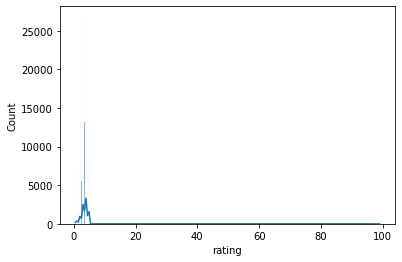

In [14]:
sns.histplot(data=df_rating, x="rating", kde=True)

# 1.2 Movies Dataset

In [15]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [16]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [17]:
df_movies.describe()

,movieId
count,9742.000000
mean,42200.353726
std,52160.494772
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


# 2. Removing Duplicates

First, we want to be aware which columns (or combination of column)
uniquely identify a row. This is also called a surrogate key in database terms. It will make our cleaning much easier if we can identify these things, especially when it comes to duplicates. Afterwards, we can remove these duplicates.

In [18]:
df_rating[df_rating.duplicated(['userId', 'timestamp'])]

,userId,movieId,rating,timestamp
18,1,333,5.0,964981179
24,1,441,4.0,964980868
27,1,500,3.0,964981208
29,1,543,4.0,964981179
36,1,608,5.0,964982931
...,...,...,...,...
99530,609,1056,3.0,847221080
99531,609,1059,3.0,847221054
99532,609,1150,4.0,847221054
99533,609,1161,4.0,847221080


In [19]:
df_rating[(df_rating.userId == 1) & (df_rating.timestamp == 964981179)]

,userId,movieId,rating,timestamp
13,1,231,5.0,964981179
18,1,333,5.0,964981179
29,1,543,4.0,964981179
57,1,1042,4.0,964981179


In [20]:
df_rating[df_rating.duplicated(['userId', 'timestamp', 'movieId'])]

,userId,movieId,rating,timestamp


It seems there are no duplicates in the ratings dataset, data is unique
for each `timestamp`, `userId`, and `movieId`, or in other words, each row
is a unique rating of a movie at a timestamp from a certain user. 

Lets now explore the movies dataset.

In [21]:
df_movies[df_movies.duplicated(['movieId'])]

,movieId,title,genres
225,261,Little Women (1994),Drama


In [22]:
df_movies[df_movies.movieId == 261]

,movieId,title,genres
224,261,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
225,261,Little Women (1994),Drama


In [23]:
df_movies = df_movies[df_movies.movieId != 261]

In [24]:
df_movies[df_movies.movieId == 261]

,movieId,title,genres


 For the movies dataset, there was one duplicate entry. "Star Wars" and "Little Women" are definitely not the same movie. We therefore have to drop all 
movieIds with 261 because we cannot recover whether the rating will be for
"Star Wars" or "Little Women" after joining the two datasets.

# 3. Remove Nulls

Now we can assess each column in each dataset for nulls. Let's write a function
this time to iterate through the columns to see how much nulls there are.

In [25]:
for column in df_rating.columns:
  null_count = len(df_rating[df_rating[column].isna()])
  print("{} : {}".format(column, null_count))

userId : 0
movieId : 0
rating : 12
timestamp : 0


In [26]:
for column in df_movies.columns:
  null_count = len(df_movies[df_movies[column].isna()])
  print("{} : {}".format(column, null_count))

movieId : 0
title : 0
genres : 0


In [27]:
df_rating = df_rating.dropna(how='any')

In [28]:
df_rating[df_rating["rating"].isna()]

,userId,movieId,rating,timestamp


# 4. Join Tables

In [29]:
df = df_rating.merge(df_movies, on='movieId', how='left')

In [30]:
# Could not recover the movieID for two movies due to duplicate issue
# Some rows will be null, lets just drop those
df = df.dropna(how='any')

In [31]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


# 5. Exercises!

We have one wrangled, cleaned, and consolidated dataset now. But there is more potential work to be done!
1. The `title` column actually has the year of the movie which could be a useful
   feature. Can we extract this? 
2. The `genres` are one giant string, can we make this more useful of a column?
   Perhaps change it to a list. 
3. We saw earlier there were outliers in `ratings`. Can we clean this up a bit?
4. The `timestamp` column is in unix time which is not very user friendly. Can 
   we convert it to something more meaningful?

## 5.1 Excercise: Extract year from title column

In [ ]:
# YOUR CODE GOES HERE 

## 5.2 Excercise: Convert Genres to a List

Bonus Exercise: How would you filter rows based on this column of lists?

In [32]:
df['genres_clean'] = df['genres'].str.split("|")

In [33]:
df.head()

,userId,movieId,rating,timestamp,title,genres,genres_clean
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]"
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,"[Action, Crime, Thriller]"
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,"[Mystery, Thriller]"
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,"[Crime, Mystery, Thriller]"


In [34]:
df[df['genres_clean'].apply(lambda x: 'Action' in x)].head() # Pulls up first 5 movies which have action in their genre

,userId,movieId,rating,timestamp,title,genres,genres_clean
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,"[Action, Crime, Thriller]"
5,1,70,3.0,964982400,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller,"[Action, Comedy, Horror, Thriller]"
7,1,110,4.0,964982176,Braveheart (1995),Action|Drama|War,"[Action, Drama, War]"
8,1,151,5.0,964984041,Rob Roy (1995),Action|Drama|Romance|War,"[Action, Drama, Romance, War]"
10,1,163,5.0,964983650,Desperado (1995),Action|Romance|Western,"[Action, Romance, Western]"


## 5.3 Excercise: Convert Unix Timestamp to Human-Readable Timestamp

Hint: Use the pandas method pd.to_datetime()

In [36]:
df['timestamp']=pd.to_datetime(df['timestamp'])

In [37]:
df.head()

,userId,movieId,rating,timestamp,title,genres,genres_clean
0,1,1,4.0,1970-01-01 00:00:00.964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,1,3,4.0,1970-01-01 00:00:00.964981247,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]"
2,1,6,4.0,1970-01-01 00:00:00.964982224,Heat (1995),Action|Crime|Thriller,"[Action, Crime, Thriller]"
3,1,47,5.0,1970-01-01 00:00:00.964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,"[Mystery, Thriller]"
4,1,50,5.0,1970-01-01 00:00:00.964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,"[Crime, Mystery, Thriller]"


## 5.4 Exercise: Remove Outliers

In [ ]:
# YOUR CODE GOES HERE
# e.g. remove out of bounds ratings
# Find timestamps that are not logical
